In [1]:
import numpy as np
import qiskit
import qutip
from qiskit import QuantumCircuit,execute, transpile, Aer, IBMQ,ClassicalRegister, QuantumRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library.standard_gates import *
import matplotlib.pyplot as plt
from qiskit_symb.quantum_info import Statevector
from qiskit_symb.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit.circuit import Parameter, ParameterVector
import random

In [14]:
z = []
y = []
x = []
ae = Aer.get_backend("qasm_simulator")
ambiente = QuantumRegister(1,'env')
sistema = QuantumRegister(1,'sis')
#Derivación operación ctrl_sigmax
#sigma_x = [[0,1],[1,0]]
#aux_qc = QuantumCircuit(1, name = "sigma_x")
#aux_qc.unitary(sigma_x,0)
#ctrl_u = aux_qc.to_gate().control(num_ctrl_qubits = 1,ctrl_state = '0')

theta = np.linspace(0,2*np.pi,1000)

#Obtención de mediciones z,y,x
def medicion(N0,N1,N,a):
    med = (N0/N) - (N1/N)
    a.append(med)
def medicion_y(N0,N1,N,a):
    med = (N1/N) - (N0/N)
    a.append(med)

#preparación estado inicial del ambiente
#|psi> = a*|0> + b|1>
def estado_inicial(q,a,b,c):
    #q.h(0)
    #q.x(0)
    q.ry(np.pi/4,0)
    q.u(a,b,c,1)

#circuito final que involucra la interacción ambiente-sistema
#medición en z
def circuito_final_z(q,a,b,c):
    estado_inicial(q,a,b,c)
    #q.append(ctrl_sigma,[0,1])
    q.barrier()
    q.x(0)
    q.cx(0,1)
    q.x(0)
    q.barrier()
    q.measure(1,1)
    
#circuito para medir en x
def circuito_final_x(q,a,b,c):
    estado_inicial(q,a,b,c)
    #q.append(ctrl_sigma,[0,1])
    q.barrier()
    q.x(0)
    q.cx(0,1)
    q.x(0)
    q.barrier() #medición en x
    q.h(1)
    q.barrier()
    q.measure(1,1)

#circuito para medir en y
def circuito_final_y(q,a,b,c):
    estado_inicial(q,a,b,c)
    #q.append(ctrl_sigma,[0,1])
    q.barrier()
    q.x(0)
    q.cx(0,1)
    q.x(0)
    q.barrier() #medición en y
    q.sdg(1)
    q.h(1)
    q.barrier()
    q.measure(1,1)


for i in range(500):
    a = random.choice(list(theta))
    b = random.choice(list(theta))
    c = random.choice(list(theta))
    qc_z = QuantumCircuit(ambiente,sistema,ClassicalRegister(2))
    qc_x = QuantumCircuit(ambiente,sistema,ClassicalRegister(2))
    qc_y = QuantumCircuit(ambiente,sistema,ClassicalRegister(2))
    circuito_final_x(qc_x,a,b,c)
    circuito_final_y(qc_y,a,b,c)
    circuito_final_z(qc_z,a,b,c)
    
    ### medición en x,y,z ###
    results_x = execute(qc_x,backend = ae,shots = 600).result()
    results_y = execute(qc_y,backend = ae,shots = 600).result()
    results_z = execute(qc_z,backend = ae,shots = 600).result()
    
    ###obtención de datos en x,y,z###
    count_x = results_x.get_counts()
    count_y = results_y.get_counts()
    count_z = results_z.get_counts()
    
    # medición en x #
    keys_x = list(count_x.keys())
    
    try:
        aux = keys_x[1]
        
        if (keys_x[0] in ['10','00'] and keys_x[1] in ['10','00']):

            if (keys_x[0] == '10'):
                N1_x = count_x[keys_x[0]]
                N0_x = count_x[keys_x[1]]

            elif (keys_x[1] == '10'):
                N1_x = count_x[keys_x[1]]
                N0_x = count_x[keys_x[0]]

            elif (keys_x[0] == '00'):
                N0_x = count_x[keys_x[0]]
                N1_x = count_x[keys_x[1]]

            elif (keys_x[1] == '00'):
                N0_x = count_x[keys_x[1]]
                N1_x = count_x[keys_x[0]]

        else:
            print("error en la secuencia x, verificar la secuencia")
            count_x
            break
    except:
        
        if (keys_x[0] in ['10','00']):
            
            if (keys_x[0] == '10'):
                N1_x = count_x[keys_x[0]]
                N0_x = 0
            
            elif (keys_x[0] == '00'):
                N0_x = count_x[keys_x[0]]
                N1_x = 0
        else:
            print("error en la secuencia x, verificar la secuencia")
            count_x
            break
                
    medicion(N0_x,N1_x,600,x)
    
    #medición en y
    
    keys_y = list(count_y.keys())
        
    try:
        aux = keys_y[1]
        
        if (keys_y[0] in ['10','00'] and keys_y[1] in ['10','00']):

            if (keys_y[0] == '10'):
                N1_y = count_y[keys_y[0]]
                N0_y = count_y[keys_y[1]]

            elif (keys_y[1] == '10'):
                N1_y = count_y[keys_y[1]]
                N0_y = count_y[keys_y[0]]

            elif (keys_y[0] == '00'):
                N0_y = count_y[keys_y[0]]
                N1_y = count_y[keys_y[1]]

            elif (keys_y[1] == '00'):
                N0_y = count_y[keys_y[1]]
                N1_y = count_y[keys_y[0]]

        else:
            print("error en la secuencia y, verificar la secuencia")
            count_y
            break
    except:
        
        if (keys_y[0] in ['10','00']):
            
            if (keys_y[0] == '10'):
                N1_y = count_y[keys_y[0]]
                N0_y = 0
            
            elif (keys_y[0] == '00'):
                N0_y = count_y[keys_y[0]]
                N1_y = 0
        else:
            print("error en la secuencia y, verificar la secuencia")
            count_y
            break
                
    medicion_y(N0_y,N1_y,600,y)
    
    
    #medición en z
    
    keys_z = list(count_z.keys())
    
    try:
        aux = keys_z[1]
        
        if (keys_z[0] in ['10','00'] and keys_z[1] in ['10','00']):

            if (keys_z[0] == '10'):
                N1_z = count_z[keys_z[0]]
                N0_z = count_z[keys_z[1]]

            elif (keys_z[1] == '10'):
                N1_z = count_z[keys_z[1]]
                N0_z = count_z[keys_z[0]]

            elif (keys_z[0] == '00'):
                N0_z = count_z[keys_z[0]]
                N1_z = count_z[keys_z[1]]

            elif (keys_z[1] == '00'):
                N0_z = count_z[keys_z[1]]
                N1_z = count_z[keys_z[0]]

        else:
            print("error en la secuencia y, verificar la secuencia")
            count_z
            break
    except:
        
        if (keys_z[0] in ['10','00']):
            
            if (keys_z[0] == '10'):
                N1_z = count_z[keys_z[0]]
                N0_z = 0
            
            elif (keys_z[0] == '00'):
                N0_z = count_z[keys_z[0]]
                N1_z = 0
        else:
            print("error en la secuencia y, verificar la secuencia")
            count_z
            break
                
    medicion(N0_z,N1_z,600,z)
    
    #limpieza de circuitos
    qc_z.clear()
    qc_x.clear()
    qc_y.clear()


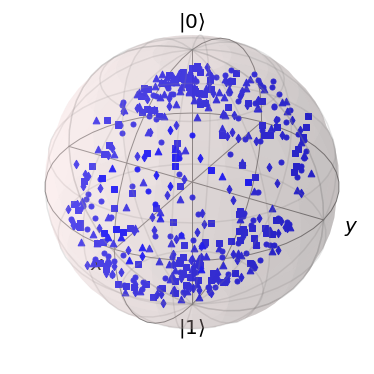

In [15]:
bloch = qutip.Bloch()
for k in range(len(x)):
    bloch.add_points([x[k],y[k],z[k]],'b')
    
bloch.show()

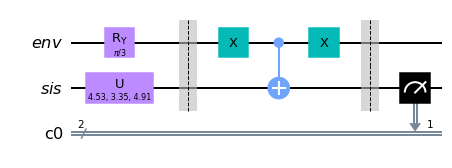

In [5]:
qc_z.draw("mpl")

In [15]:
z = []
y = []
x = []
ae = Aer.get_backend("qasm_simulator")
ambiente = QuantumRegister(1,'env')
sistema = QuantumRegister(1,'sis')
#Derivación operación ctrl_sigmax
#sigma_x = [[0,1],[1,0]]
#aux_qc = QuantumCircuit(1, name = "sigma_x")
#aux_qc.unitary(sigma_x,0)
#ctrl_u = aux_qc.to_gate().control(num_ctrl_qubits = 1,ctrl_state = '0')

theta = np.linspace(0,2*np.pi,1000)

#Obtención de mediciones z,y,x
def medicion(N0,N1,N,a):
    med = (N0/N) - (N1/N)
    a.append(med)
def medicion_y(N0,N1,N,a):
    med = (N1/N) - (N0/N)
    a.append(med)

#preparación estado inicial del ambiente
#|psi> = a*|0> + b|1>
def estado_inicial(q,a,b,c):
    #q.h(0)
    #q.x(0)
    q.ry(np.pi/4,0)
    q.u(a,b,c,1)

#circuito final que involucra la interacción ambiente-sistema
#medición en z
def circuito_final_z(q,a,b,c):
    estado_inicial(q,a,b,c)
    #q.append(ctrl_sigma,[0,1])
    q.barrier()
    q.x(0)
    q.cz(0,1)
    q.x(0)
    q.barrier()
    q.measure(1,1)
    
#circuito para medir en x
def circuito_final_x(q,a,b,c):
    estado_inicial(q,a,b,c)
    #q.append(ctrl_sigma,[0,1])
    q.barrier()
    q.x(0)
    q.cz(0,1)
    q.x(0)
    q.barrier() #medición en x
    q.h(1)
    q.barrier()
    q.measure(1,1)

#circuito para medir en y
def circuito_final_y(q,a,b,c):
    estado_inicial(q,a,b,c)
    #q.append(ctrl_sigma,[0,1])
    q.barrier()
    q.x(0)
    q.cz(0,1)
    q.x(0)
    q.barrier() #medición en y
    q.sdg(1)
    q.h(1)
    q.barrier()
    q.measure(1,1)


for i in range(1):
    a = random.choice(list(theta))
    b = random.choice(list(theta))
    c = random.choice(list(theta))
    qc_z = QuantumCircuit(ambiente,sistema,ClassicalRegister(2))
    qc_x = QuantumCircuit(ambiente,sistema,ClassicalRegister(2))
    qc_y = QuantumCircuit(ambiente,sistema,ClassicalRegister(2))
    circuito_final_x(qc_x,a,b,c)
    circuito_final_y(qc_y,a,b,c)
    circuito_final_z(qc_z,a,b,c)
    
    ### medición en x,y,z ###
    results_x = execute(qc_x,backend = ae,shots = 600).result()
    results_y = execute(qc_y,backend = ae,shots = 600).result()
    results_z = execute(qc_z,backend = ae,shots = 600).result()
    
    ###obtención de datos en x,y,z###
    count_x = results_x.get_counts()
    count_y = results_y.get_counts()
    count_z = results_z.get_counts()
    
    # medición en x #
    keys_x = list(count_x.keys())
    
    try:
        aux = keys_x[1]
        
        if (keys_x[0] in ['10','00'] and keys_x[1] in ['10','00']):

            if (keys_x[0] == '10'):
                N1_x = count_x[keys_x[0]]
                N0_x = count_x[keys_x[1]]

            elif (keys_x[1] == '10'):
                N1_x = count_x[keys_x[1]]
                N0_x = count_x[keys_x[0]]

            elif (keys_x[0] == '00'):
                N0_x = count_x[keys_x[0]]
                N1_x = count_x[keys_x[1]]

            elif (keys_x[1] == '00'):
                N0_x = count_x[keys_x[1]]
                N1_x = count_x[keys_x[0]]

        else:
            print("error en la secuencia x, verificar la secuencia")
            count_x
            break
    except:
        
        if (keys_x[0] in ['10','00']):
            
            if (keys_x[0] == '10'):
                N1_x = count_x[keys_x[0]]
                N0_x = 0
            
            elif (keys_x[0] == '00'):
                N0_x = count_x[keys_x[0]]
                N1_x = 0
        else:
            print("error en la secuencia x, verificar la secuencia")
            count_x
            break
                
    medicion(N0_x,N1_x,600,x)
    
    #medición en y
    
    keys_y = list(count_y.keys())
        
    try:
        aux = keys_y[1]
        
        if (keys_y[0] in ['10','00'] and keys_y[1] in ['10','00']):

            if (keys_y[0] == '10'):
                N1_y = count_y[keys_y[0]]
                N0_y = count_y[keys_y[1]]

            elif (keys_y[1] == '10'):
                N1_y = count_y[keys_y[1]]
                N0_y = count_y[keys_y[0]]

            elif (keys_y[0] == '00'):
                N0_y = count_y[keys_y[0]]
                N1_y = count_y[keys_y[1]]

            elif (keys_y[1] == '00'):
                N0_y = count_y[keys_y[1]]
                N1_y = count_y[keys_y[0]]

        else:
            print("error en la secuencia y, verificar la secuencia")
            count_y
            break
    except:
        
        if (keys_y[0] in ['10','00']):
            
            if (keys_y[0] == '10'):
                N1_y = count_y[keys_y[0]]
                N0_y = 0
            
            elif (keys_y[0] == '00'):
                N0_y = count_y[keys_y[0]]
                N1_y = 0
        else:
            print("error en la secuencia y, verificar la secuencia")
            count_y
            break
                
    medicion_y(N0_y,N1_y,600,y)
    
    
    #medición en z
    
    keys_z = list(count_z.keys())
    
    try:
        aux = keys_z[1]
        
        if (keys_z[0] in ['10','00'] and keys_z[1] in ['10','00']):

            if (keys_z[0] == '10'):
                N1_z = count_z[keys_z[0]]
                N0_z = count_z[keys_z[1]]

            elif (keys_z[1] == '10'):
                N1_z = count_z[keys_z[1]]
                N0_z = count_z[keys_z[0]]

            elif (keys_z[0] == '00'):
                N0_z = count_z[keys_z[0]]
                N1_z = count_z[keys_z[1]]

            elif (keys_z[1] == '00'):
                N0_z = count_z[keys_z[1]]
                N1_z = count_z[keys_z[0]]

        else:
            print("error en la secuencia y, verificar la secuencia")
            count_z
            break
    except:
        
        if (keys_z[0] in ['10','00']):
            
            if (keys_z[0] == '10'):
                N1_z = count_z[keys_z[0]]
                N0_z = 0
            
            elif (keys_z[0] == '00'):
                N0_z = count_z[keys_z[0]]
                N1_z = 0
        else:
            print("error en la secuencia y, verificar la secuencia")
            count_z
            break
                
    medicion(N0_z,N1_z,600,z)
    
    #limpieza de circuitos
    #qc_z.clear()
    #qc_x.clear()
    #qc_y.clear()


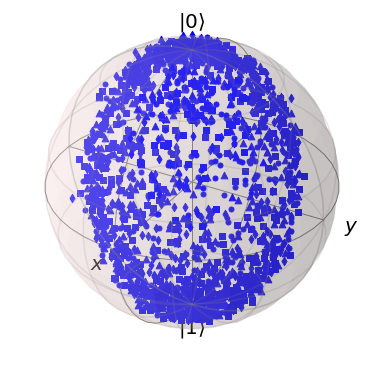

In [14]:
bloch = qutip.Bloch()
for k in range(len(x)):
    bloch.add_points([x[k],y[k],z[k]],'b')
    
bloch.show()

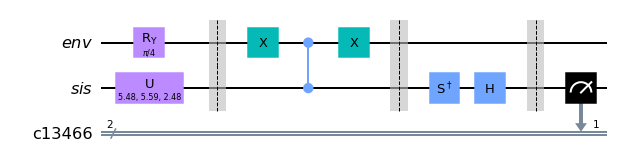

In [17]:
qc_y.draw("mpl")